# **Konvolúciós hálózatok - augmentáció és előtanított modellek**

## Ismétlés


Hagyományos konvolúció paraméterei:

      input*output*width*height

Például:   

*   bemeneti csatornák száma 10 és 
*   a kimenet 20
*   egy 7*7-es filter mellett
  
  9800 paraméterű lesz. (bias-ok nélkül)


![](https://miro.medium.com/max/2400/1*sYpl-7LlrtlOKW8RvlyKOg.png)



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Keras CNN MNIST

Forrás:

https://keras.io/examples/mnist_cnn/


In [2]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [3]:
batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                  

In [ ]:
12 * 12 * 64

9216

# Cats and dogs

In [4]:
# Adatok letöltése

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip



--2021-11-25 10:28:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 64.233.191.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   133MB/s    in 0.5s    

2021-11-25 10:28:50 (133 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
import os
os.chdir("./../tmp/")
os.getcwd()

'/tmp'

In [6]:
os.listdir()

['debugger_2n6wzua2u9',
 '__pycache__',
 '__autograph_generated_file73dfh5tg.py',
 'dap_multiplexer.f3fce9007970.root.log.INFO.20211125-094621.60',
 'dap_multiplexer.INFO',
 'initgoogle_syslog_dir.0',
 'cats_and_dogs_filtered.zip',
 '__autograph_generated_filenjp4nnvx.py']

In [7]:
# Kicsomagolás
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp/')
zip_ref.close()

In [8]:
os.listdir("./tmp/cats_and_dogs_filtered")

['train', 'validation', 'vectorize.py']

In [9]:
print(os.listdir("./tmp/cats_and_dogs_filtered/train/"))
print(os.listdir("./tmp/cats_and_dogs_filtered/train/cats/"))
print(len(list(os.listdir("./tmp/cats_and_dogs_filtered/train/cats/"))))

['dogs', 'cats']
['cat.807.jpg', 'cat.977.jpg', 'cat.296.jpg', 'cat.564.jpg', 'cat.81.jpg', 'cat.333.jpg', 'cat.542.jpg', 'cat.782.jpg', 'cat.43.jpg', 'cat.82.jpg', 'cat.689.jpg', 'cat.856.jpg', 'cat.581.jpg', 'cat.50.jpg', 'cat.384.jpg', 'cat.596.jpg', 'cat.625.jpg', 'cat.398.jpg', 'cat.896.jpg', 'cat.822.jpg', 'cat.955.jpg', 'cat.881.jpg', 'cat.80.jpg', 'cat.899.jpg', 'cat.397.jpg', 'cat.993.jpg', 'cat.812.jpg', 'cat.679.jpg', 'cat.682.jpg', 'cat.243.jpg', 'cat.444.jpg', 'cat.140.jpg', 'cat.259.jpg', 'cat.316.jpg', 'cat.21.jpg', 'cat.740.jpg', 'cat.264.jpg', 'cat.853.jpg', 'cat.785.jpg', 'cat.731.jpg', 'cat.194.jpg', 'cat.292.jpg', 'cat.538.jpg', 'cat.892.jpg', 'cat.589.jpg', 'cat.7.jpg', 'cat.202.jpg', 'cat.440.jpg', 'cat.288.jpg', 'cat.48.jpg', 'cat.617.jpg', 'cat.724.jpg', 'cat.363.jpg', 'cat.466.jpg', 'cat.413.jpg', 'cat.131.jpg', 'cat.485.jpg', 'cat.218.jpg', 'cat.396.jpg', 'cat.584.jpg', 'cat.252.jpg', 'cat.20.jpg', 'cat.347.jpg', 'cat.179.jpg', 'cat.996.jpg', 'cat.450.jpg', 'c

In [10]:
# Augmentálás

#ImageDataGen = tf.keras.preprocessing.image.ImageDataGenerator()

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'tmp/cats_and_dogs_filtered/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'tmp/cats_and_dogs_filtered/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
#train_datagen.flow(train_generator)  #  ()
#next(train_generator)
next_batch = train_generator.next()

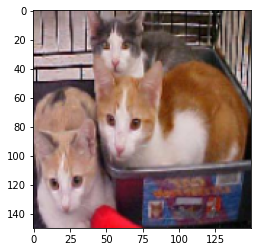

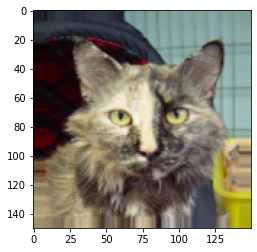

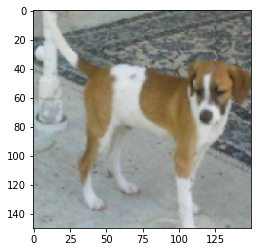

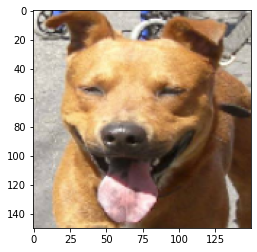

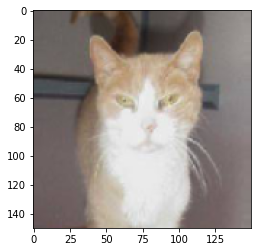

In [14]:
for i in range(5):
    plt.figure()
    plt.imshow(next_batch[0][i,:,:,:])

In [15]:
img_cat_1 = load_img("tmp/cats_and_dogs_filtered/train/cats/cat.0.jpg")
array_img_cat_1 = img_to_array(img_cat_1)  # this is a Numpy array with shape (374, 500, 3)
array_img_cat_1 = array_img_cat_1.reshape((1,) + array_img_cat_1.shape)  # this is a Numpy array with shape (1, 374, 500, 3)

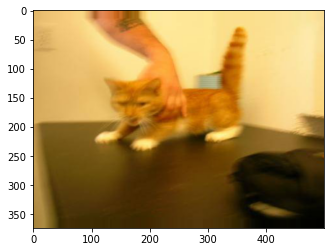

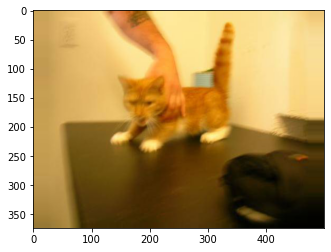

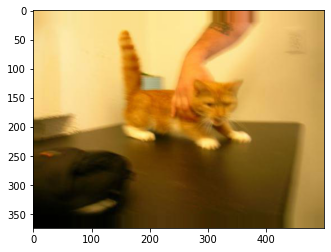

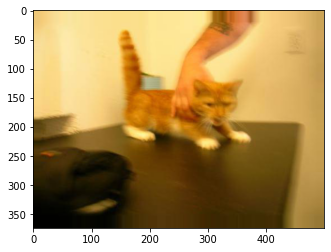

In [16]:
i = 0
for batch in train_datagen.flow(array_img_cat_1):
    plt.figure()
    plt.imshow(batch[0,:,:,:])
    i += 1
    if i > 3:
        break

Kész hálózatok használata

In [17]:
vgg_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

58900480/58889256 [==============================] - 1s 0us/step


In [18]:
x = vgg_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = tf.keras.layers.Dense(1024, activation='relu')(x)

predictions = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(x)

# this is the model we will train
model = tf.keras.models.Model(inputs=vgg_model.input, outputs=predictions)

for layer in vgg_model.layers:
    layer.trainable = False


model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [20]:
history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=round(train_generator.n / 32),
                    validation_data=validation_generator,
                    validation_steps=round(validation_generator.n / 32),)



Epoch 1/10
62/62 [==============================] - 23s 373ms/step - loss: 0.5211 - acc: 0.7322 - val_loss: 0.3572 - val_acc: 0.8327
Epoch 2/10
62/62 [==============================] - 23s 368ms/step - loss: 0.4022 - acc: 0.8064 - val_loss: 0.2960 - val_acc: 0.8649
Epoch 3/10
62/62 [==============================] - 23s 373ms/step - loss: 0.3427 - acc: 0.8486 - val_loss: 0.3072 - val_acc: 0.8569
Epoch 4/10
62/62 [==============================] - 23s 373ms/step - loss: 0.3251 - acc: 0.8511 - val_loss: 0.2847 - val_acc: 0.8679
Epoch 5/10
62/62 [==============================] - 23s 371ms/step - loss: 0.3001 - acc: 0.8587 - val_loss: 0.2995 - val_acc: 0.8730
Epoch 6/10
62/62 [==============================] - 23s 373ms/step - loss: 0.2979 - acc: 0.8674 - val_loss: 0.2731 - val_acc: 0.8810
Epoch 7/10
62/62 [==============================] - 23s 367ms/step - loss: 0.2800 - acc: 0.8806 - val_loss: 0.3096 - val_acc: 0.8609
Epoch 8/10
62/62 [==============================] - 23s 366ms/step - 

       loss       acc  val_loss   val_acc  epoch
5  0.297862  0.867378  0.273056  0.881048      5
6  0.279950  0.880589  0.309591  0.860887      6
7  0.271528  0.877541  0.307858  0.866935      7
8  0.236390  0.892785  0.462682  0.821573      8
9  0.256619  0.887703  0.266368  0.889113      9


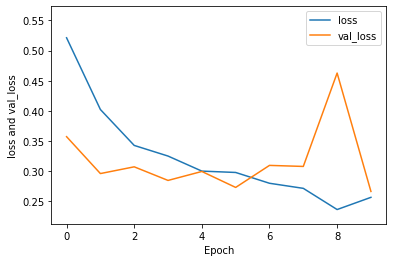

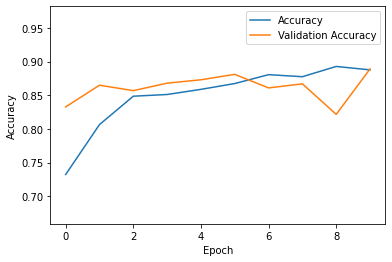

In [22]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss and val_loss')
    plt.plot(hist['epoch'], hist['loss'], label='loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'val_loss')
    plt.legend()
    plt.ylim([(min(hist['loss'].min(), hist['val_loss'].min()))*0.9,
              (max(hist['loss'].max(), hist['val_loss'].max()))*1.1])


    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],
           label='Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Validation Accuracy')
    plt.legend()
    plt.ylim([(min(hist['acc'].min(), hist['val_acc'].min()))*0.9,
              (max(hist['acc'].max(), hist['val_acc'].max()))*1.1])


plot_history(history)

